# 🏆 MODEL COMPARISON DASHBOARD
## Pothole Detection - Performance Analysis
---

In [1]:
import os, json, pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

# Set style - DARK THEME
plt.style.use('dark_background')
sns.set_palette('husl')

# Enhanced Model Colors - Vibrant & Modern
MODEL_COLORS = {
    'PureCNN': '#00D9FF',      # Cyan Electric
    'ResNet50': '#B24BF3',     # Purple Neon
    'EfficientNetB0': '#FF6B35' # Orange Vibrant
}

# Gradient colors for backgrounds
BG_GRADIENT = {
    'dark': '#0A0E27',
    'medium': '#1A1F3A',
    'light': '#2A3F5F'
}

# Paths - FIXED ResNet50
PATHS = {
    'PureCNN': r'C:\UAP_MachineLearning\PureCNN',
    'ResNet50': r'C:\UAP_MachineLearning\ResNet50',
    'EfficientNetB0': r'C:\UAP_MachineLearning\EfficientNet'
}

OUTPUT_PATH = r'C:\UAP_MachineLearning\allmodel'
os.makedirs(OUTPUT_PATH, exist_ok=True)

print("✅ Setup complete!")
print(f"📁 Output: {OUTPUT_PATH}")
print(f"🎨 Theme: Dark Mode with Neon Colors")

✅ Setup complete!
📁 Output: C:\UAP_MachineLearning\allmodel
🎨 Theme: Dark Mode with Neon Colors


In [2]:
# Load summaries
summaries = {}

for model_name, path in PATHS.items():
    for json_file in ['project_summary.json', 'summary.json']:
        json_path = os.path.join(path, json_file)
        if os.path.exists(json_path):
            with open(json_path, 'r', encoding='utf-8') as f:
                summaries[model_name] = json.load(f)
            print(f"✅ {model_name}")
            break

print(f"\n📊 Loaded {len(summaries)} models")

✅ PureCNN
✅ ResNet50
✅ EfficientNetB0

📊 Loaded 3 models


In [3]:
# Create comparison data
comparison_data = []

for model_name, summary in summaries.items():
    perf = summary.get('performance', {})
    comparison_data.append({
        'Model': model_name,
        'Accuracy': perf.get('test_accuracy', perf.get('accuracy', 0)) * 100,
        'Precision': perf.get('test_precision', perf.get('precision', 0)) * 100,
        'Recall': perf.get('test_recall', perf.get('recall', 0)) * 100,
        'F1-Score': perf.get('test_f1', perf.get('f1', 0)) * 100
    })

df = pd.DataFrame(comparison_data).round(2)
df['Average'] = df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].mean(axis=1)
df = df.sort_values('Average', ascending=False).reset_index(drop=True)

print("\n🏆 RANKING:")
print(df[['Model', 'Accuracy', 'Average']].to_string(index=False))

df.to_csv(os.path.join(OUTPUT_PATH, 'comparison.csv'), index=False)


🏆 RANKING:
         Model  Accuracy  Average
       PureCNN     99.49  99.4950
      ResNet50     99.16  99.1575
EfficientNetB0     98.48  98.4900


C:\Users\zeeda\AppData\Local\Temp\ipykernel_2216\2124974709.py:43: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zeeda\AppData\Local\Temp\ipykernel_2216\2124974709.py:44: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(OUTPUT_PATH, 'performance_bars.png'),
C:\Users\zeeda\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


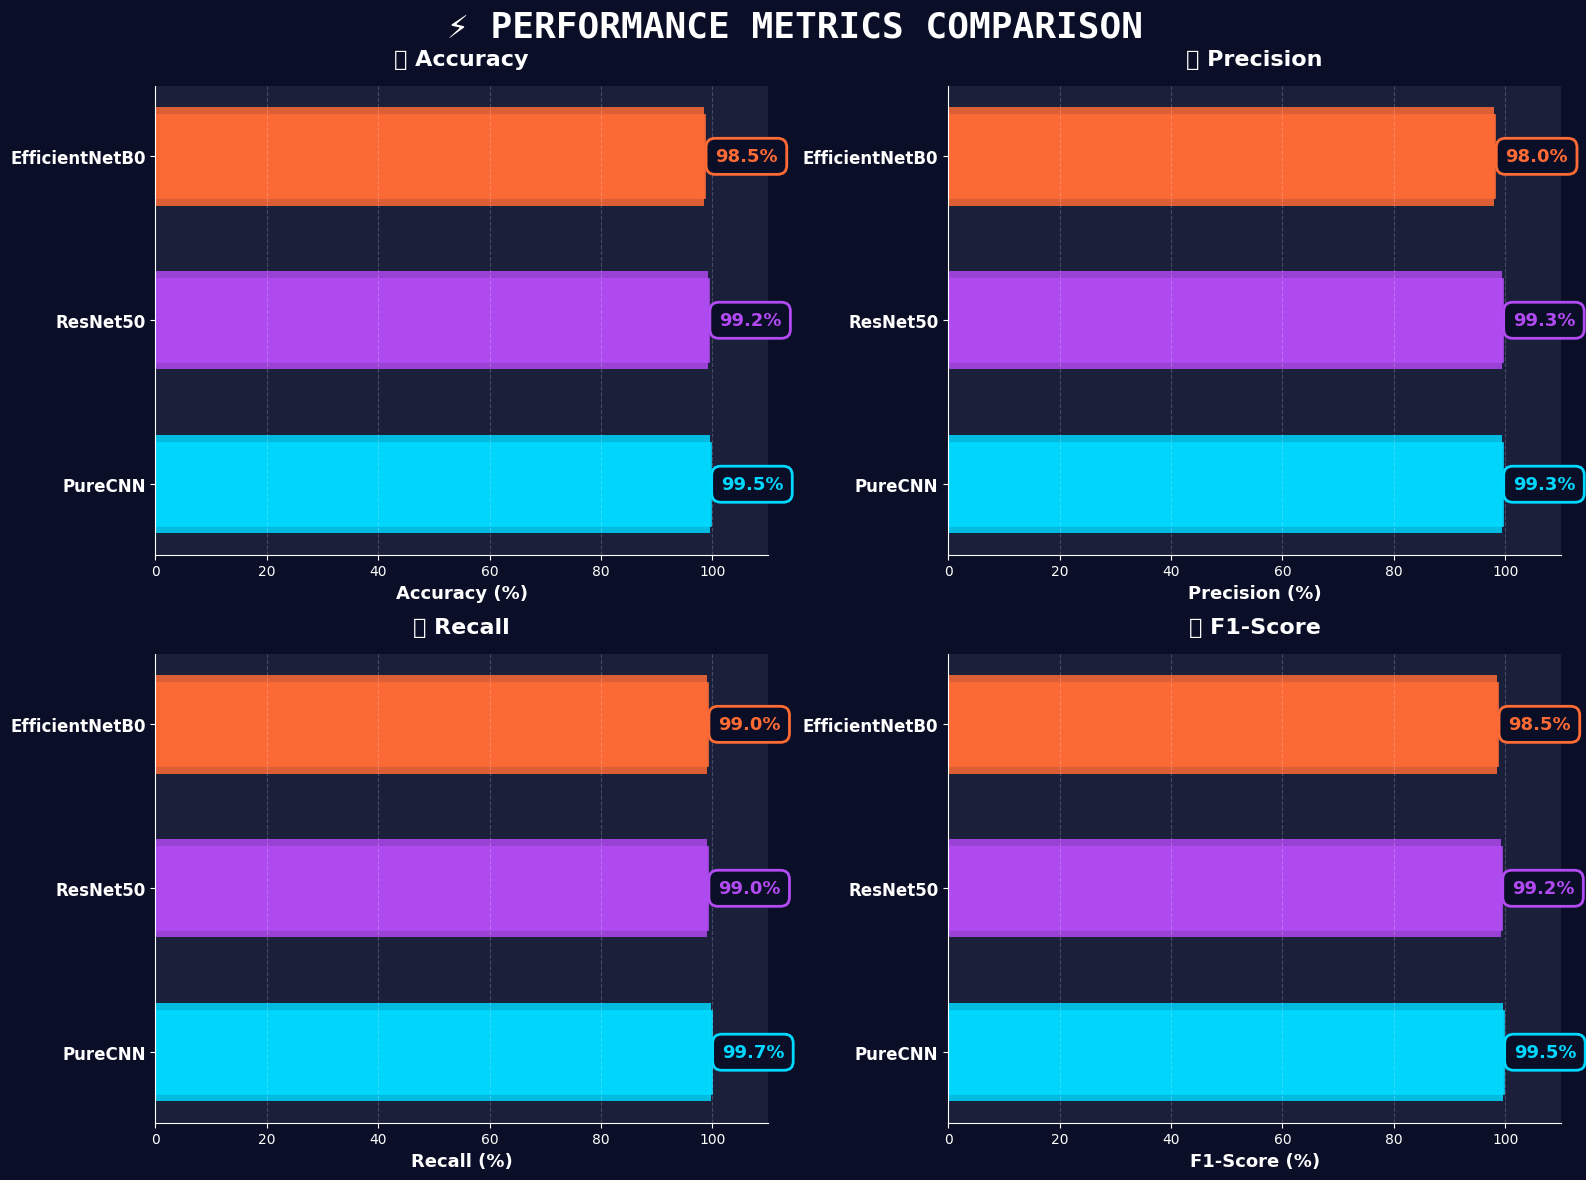

✅ Performance bars saved


In [4]:
# VIZ 1: Modern Performance Bars with Glow Effect
fig, axes = plt.subplots(2, 2, figsize=(16, 12), facecolor=BG_GRADIENT['dark'])
fig.suptitle('⚡ PERFORMANCE METRICS COMPARISON', fontsize=26, weight='bold', 
             color='white', y=0.98, fontfamily='monospace')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    ax.set_facecolor(BG_GRADIENT['medium'])
    
    # Create bars with glow effect
    for i, (_, row) in enumerate(df.iterrows()):
        color = MODEL_COLORS[row['Model']]
        value = row[metric]
        
        # Glow effect (multiple bars with decreasing alpha)
        for glow in range(5, 0, -1):
            ax.barh(i, value, height=0.6, left=0, 
                   color=color, alpha=0.1*glow, edgecolor='none')
        
        # Main bar
        bar = ax.barh(i, value, height=0.5, left=0,
                     color=color, edgecolor=color, linewidth=2, alpha=0.9)
        
        # Value label with background
        ax.text(value + 2, i, f'{value:.1f}%', 
               va='center', fontsize=13, weight='bold', color=color,
               bbox=dict(boxstyle='round,pad=0.5', facecolor=BG_GRADIENT['dark'], 
                        edgecolor=color, linewidth=2))
    
    ax.set_yticks(range(len(df)))
    ax.set_yticklabels(df['Model'], fontsize=12, weight='bold')
    ax.set_xlim(0, 110)
    ax.set_xlabel(f'{metric} (%)', fontsize=13, weight='bold', color='white')
    ax.set_title(f'🎯 {metric}', fontsize=16, weight='bold', color='white', pad=15)
    ax.grid(axis='x', alpha=0.2, linestyle='--', color='white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, 'performance_bars.png'), 
           dpi=200, bbox_inches='tight', facecolor=BG_GRADIENT['dark'])
plt.show()
print("✅ Performance bars saved")

C:\Users\zeeda\AppData\Local\Temp\ipykernel_2216\2999066516.py:43: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\zeeda\AppData\Local\Temp\ipykernel_2216\2999066516.py:44: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans Mono.
  plt.savefig(os.path.join(OUTPUT_PATH, 'radar_neon.png'),
C:\Users\zeeda\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


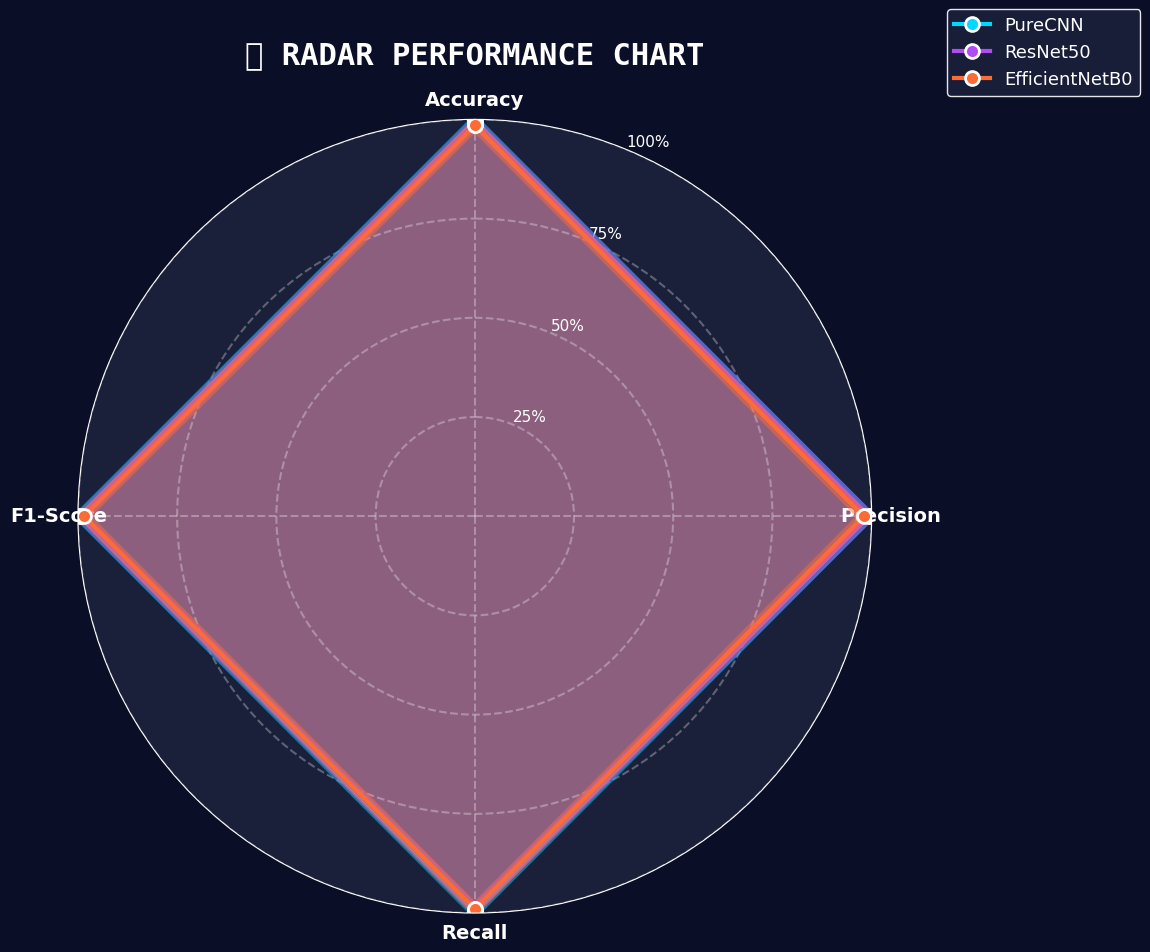

✅ Neon radar saved


In [5]:
# VIZ 2: Neon Radar Chart
from math import pi

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'), 
                       facecolor=BG_GRADIENT['dark'])
ax.set_facecolor(BG_GRADIENT['medium'])

categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
N = len(categories)
angles = [n / N * 2 * pi for n in range(N)]
angles += angles[:1]

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=14, weight='bold', color='white')
ax.set_ylim(0, 100)
ax.set_yticks([25, 50, 75, 100])
ax.set_yticklabels(['25%', '50%', '75%', '100%'], fontsize=11, color='white')
ax.grid(True, linestyle='--', alpha=0.3, color='white', linewidth=1.5)

# Plot with glow effect
for _, row in df.iterrows():
    values = row[categories].values.tolist() + [row[categories].values[0]]
    color = MODEL_COLORS[row['Model']]
    
    # Glow layers
    for alpha in [0.1, 0.2, 0.3]:
        ax.plot(angles, values, linewidth=8, color=color, alpha=alpha)
        ax.fill(angles, values, alpha=alpha*0.3, color=color)
    
    # Main line
    ax.plot(angles, values, 'o-', linewidth=3, label=row['Model'], 
           color=color, markersize=10, markeredgewidth=2, markeredgecolor='white')
    ax.fill(angles, values, alpha=0.25, color=color)

ax.set_title('🌟 RADAR PERFORMANCE CHART', fontsize=22, weight='bold', 
            color='white', pad=40, fontfamily='monospace')
ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.15), fontsize=13, 
         frameon=True, facecolor=BG_GRADIENT['medium'], edgecolor='white', 
         labelcolor='white', framealpha=0.9)

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, 'radar_neon.png'), 
           dpi=200, bbox_inches='tight', facecolor=BG_GRADIENT['dark'])
plt.show()
print("✅ Neon radar saved")

C:\Users\zeeda\AppData\Local\Temp\ipykernel_2216\1165168054.py:40: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\zeeda\AppData\Local\Temp\ipykernel_2216\1165168054.py:41: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans Mono.
  plt.savefig(os.path.join(OUTPUT_PATH, 'heatmap_gradient.png'),
C:\Users\zeeda\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


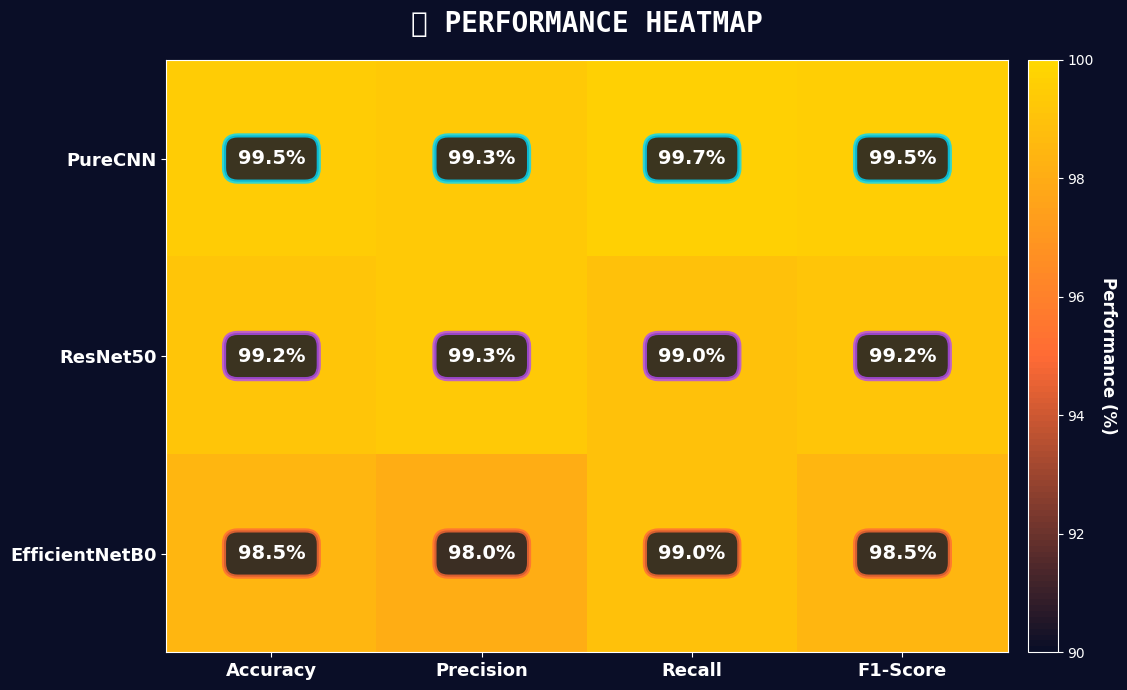

✅ Gradient heatmap saved


In [6]:
# VIZ 3: Gradient Heatmap
fig, ax = plt.subplots(figsize=(12, 7), facecolor=BG_GRADIENT['dark'])
ax.set_facecolor(BG_GRADIENT['medium'])

heatmap_data = df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']]

# Custom colormap - dark to bright
from matplotlib.colors import LinearSegmentedColormap
colors_map = ['#0A0E27', '#FF6B35', '#FFD700']
n_bins = 100
cmap = LinearSegmentedColormap.from_list('custom', colors_map, N=n_bins)

im = ax.imshow(heatmap_data.values, cmap=cmap, aspect='auto', vmin=90, vmax=100)

ax.set_xticks(np.arange(len(heatmap_data.columns)))
ax.set_yticks(np.arange(len(heatmap_data)))
ax.set_xticklabels(heatmap_data.columns, fontsize=13, weight='bold', color='white')
ax.set_yticklabels(heatmap_data.index, fontsize=13, weight='bold', color='white')

# Add values with colored backgrounds
for i in range(len(heatmap_data)):
    for j in range(len(heatmap_data.columns)):
        value = heatmap_data.values[i, j]
        text = ax.text(j, i, f'{value:.1f}%',
                      ha="center", va="center", fontsize=14, weight='bold',
                      color='white',
                      bbox=dict(boxstyle='round,pad=0.7', 
                               facecolor=BG_GRADIENT['dark'], 
                               edgecolor=MODEL_COLORS[heatmap_data.index[i]], 
                               linewidth=3, alpha=0.8))

cbar = ax.figure.colorbar(im, ax=ax, pad=0.02)
cbar.ax.set_ylabel('Performance (%)', rotation=-90, va="bottom", 
                   fontsize=12, weight='bold', color='white')
cbar.ax.tick_params(colors='white')

ax.set_title('🔥 PERFORMANCE HEATMAP', fontsize=20, weight='bold', 
            color='white', pad=20, fontfamily='monospace')

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, 'heatmap_gradient.png'), 
           dpi=200, bbox_inches='tight', facecolor=BG_GRADIENT['dark'])
plt.show()
print("✅ Gradient heatmap saved")

C:\Users\zeeda\AppData\Local\Temp\ipykernel_2216\1628842681.py:59: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\zeeda\AppData\Local\Temp\ipykernel_2216\1628842681.py:59: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zeeda\AppData\Local\Temp\ipykernel_2216\1628842681.py:59: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zeeda\AppData\Local\Temp\ipykernel_2216\1628842681.py:59: UserWarning: Glyph 129353 (\N{THIRD PLACE MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zeeda\AppData\Local\Temp\ipykernel_2216\1628842681.py:60: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans Mono.
  plt.savefig(os.path.join(OUTPUT_PATH, 'podium.png'),
C:\Users\zeeda\AppData\Local\Temp\ipykernel_2216\1628842681.py:60: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL})

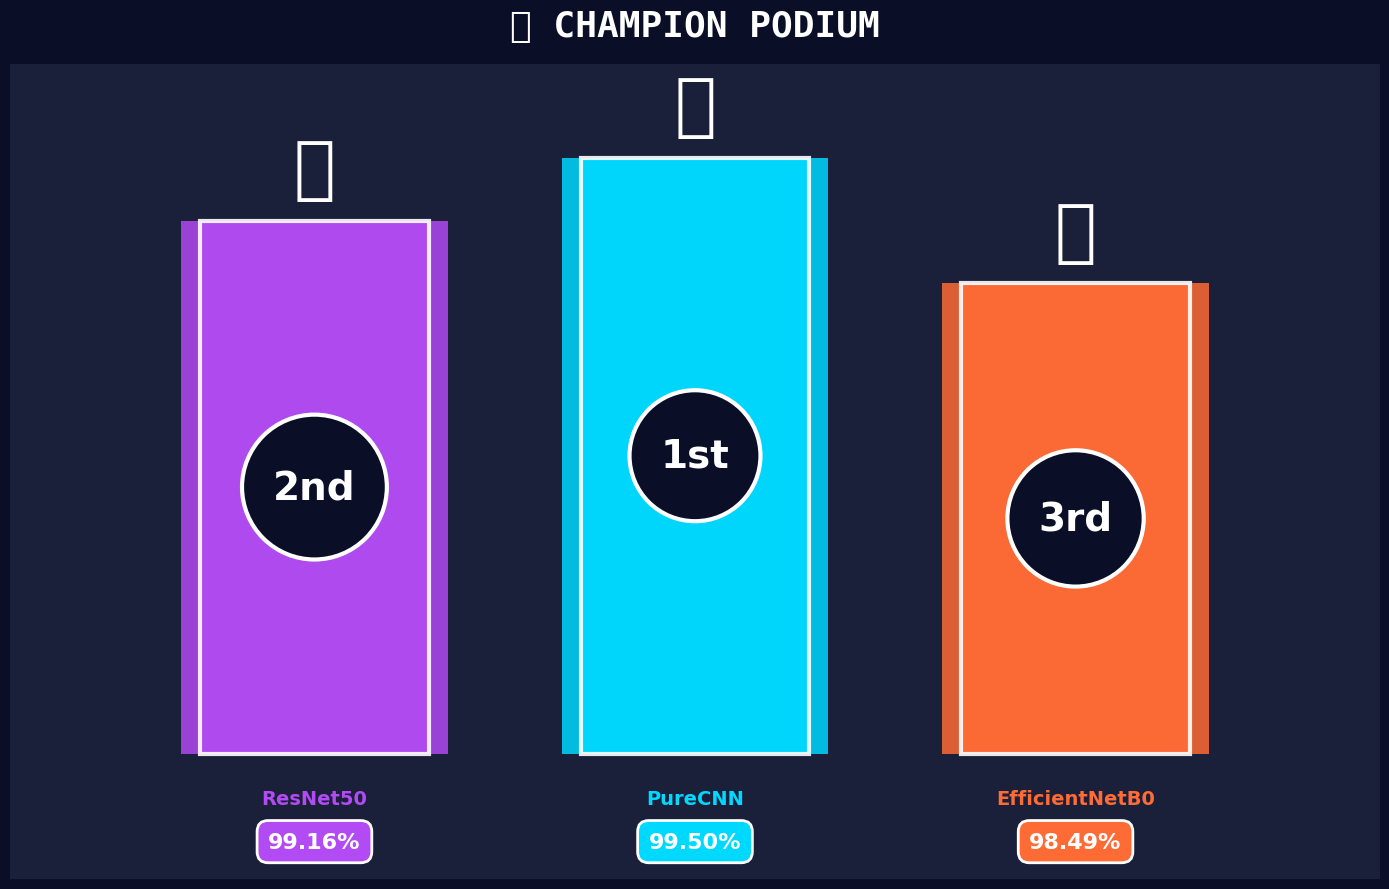

✅ Podium saved


In [7]:
# VIZ 4: Champion Podium
fig, ax = plt.subplots(figsize=(14, 9), facecolor=BG_GRADIENT['dark'])
ax.set_facecolor(BG_GRADIENT['medium'])

# Podium heights and positions
positions = [1, 0, 2]  # 2nd, 1st, 3rd
heights = [df.loc[1, 'Average'] if len(df) > 1 else 0, 
           df.loc[0, 'Average'],
           df.loc[2, 'Average'] if len(df) > 2 else 0]
podium_heights = [85, 95, 75]  # Visual heights
medals = ['🥈', '🥇', '🥉']
ranks = ['2nd', '1st', '3rd']

for i, (pos, h, ph, medal, rank) in enumerate(zip(positions, heights, podium_heights, medals, ranks)):
    if i < len(df):
        model = df.loc[pos, 'Model']
        color = MODEL_COLORS[model]
        
        # Podium bar with glow
        for glow in range(10, 0, -2):
            ax.bar(i, ph, width=0.7, bottom=0, color=color, 
                  alpha=0.05*glow, edgecolor='none')
        
        # Main podium
        bar = ax.bar(i, ph, width=0.6, bottom=0, color=color, 
                    edgecolor='white', linewidth=3, alpha=0.9)
        
        # Medal
        ax.text(i, ph + 5, medal, ha='center', fontsize=50)
        
        # Rank
        ax.text(i, ph/2, rank, ha='center', va='center',
               fontsize=28, weight='bold', color='white',
               bbox=dict(boxstyle='circle,pad=0.8', facecolor=BG_GRADIENT['dark'],
                        edgecolor='white', linewidth=3))
        
        # Model name
        ax.text(i, -8, model, ha='center', fontsize=14, weight='bold', 
               color=color, rotation=0)
        
        # Score
        ax.text(i, -15, f'{h:.2f}%', ha='center', fontsize=16, 
               weight='bold', color='white',
               bbox=dict(boxstyle='round,pad=0.5', facecolor=color,
                        edgecolor='white', linewidth=2))

ax.set_xlim(-0.8, 2.8)
ax.set_ylim(-20, 110)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title('🏆 CHAMPION PODIUM', fontsize=26, weight='bold', 
            color='white', pad=20, fontfamily='monospace')

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, 'podium.png'), 
           dpi=200, bbox_inches='tight', facecolor=BG_GRADIENT['dark'])
plt.show()
print("✅ Podium saved")

C:\Users\zeeda\AppData\Local\Temp\ipykernel_2216\303246015.py:88: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(OUTPUT_PATH, 'ultimate_dashboard.png'),
C:\Users\zeeda\AppData\Local\Temp\ipykernel_2216\303246015.py:88: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(OUTPUT_PATH, 'ultimate_dashboard.png'),
C:\Users\zeeda\AppData\Local\Temp\ipykernel_2216\303246015.py:88: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(OUTPUT_PATH, 'ultimate_dashboard.png'),
C:\Users\zeeda\AppData\Local\Temp\ipykernel_2216\303246015.py:88: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(OUTPUT_PATH, 'ultimate_dashboard.png'),
C:\Users\zeeda\AppData\Local\Temp\ipykernel_2216\303246015.py:88: UserWarning: Glyph 129353 (\N{THIRD PLACE MEDAL}) missing from font(s) DejaVu

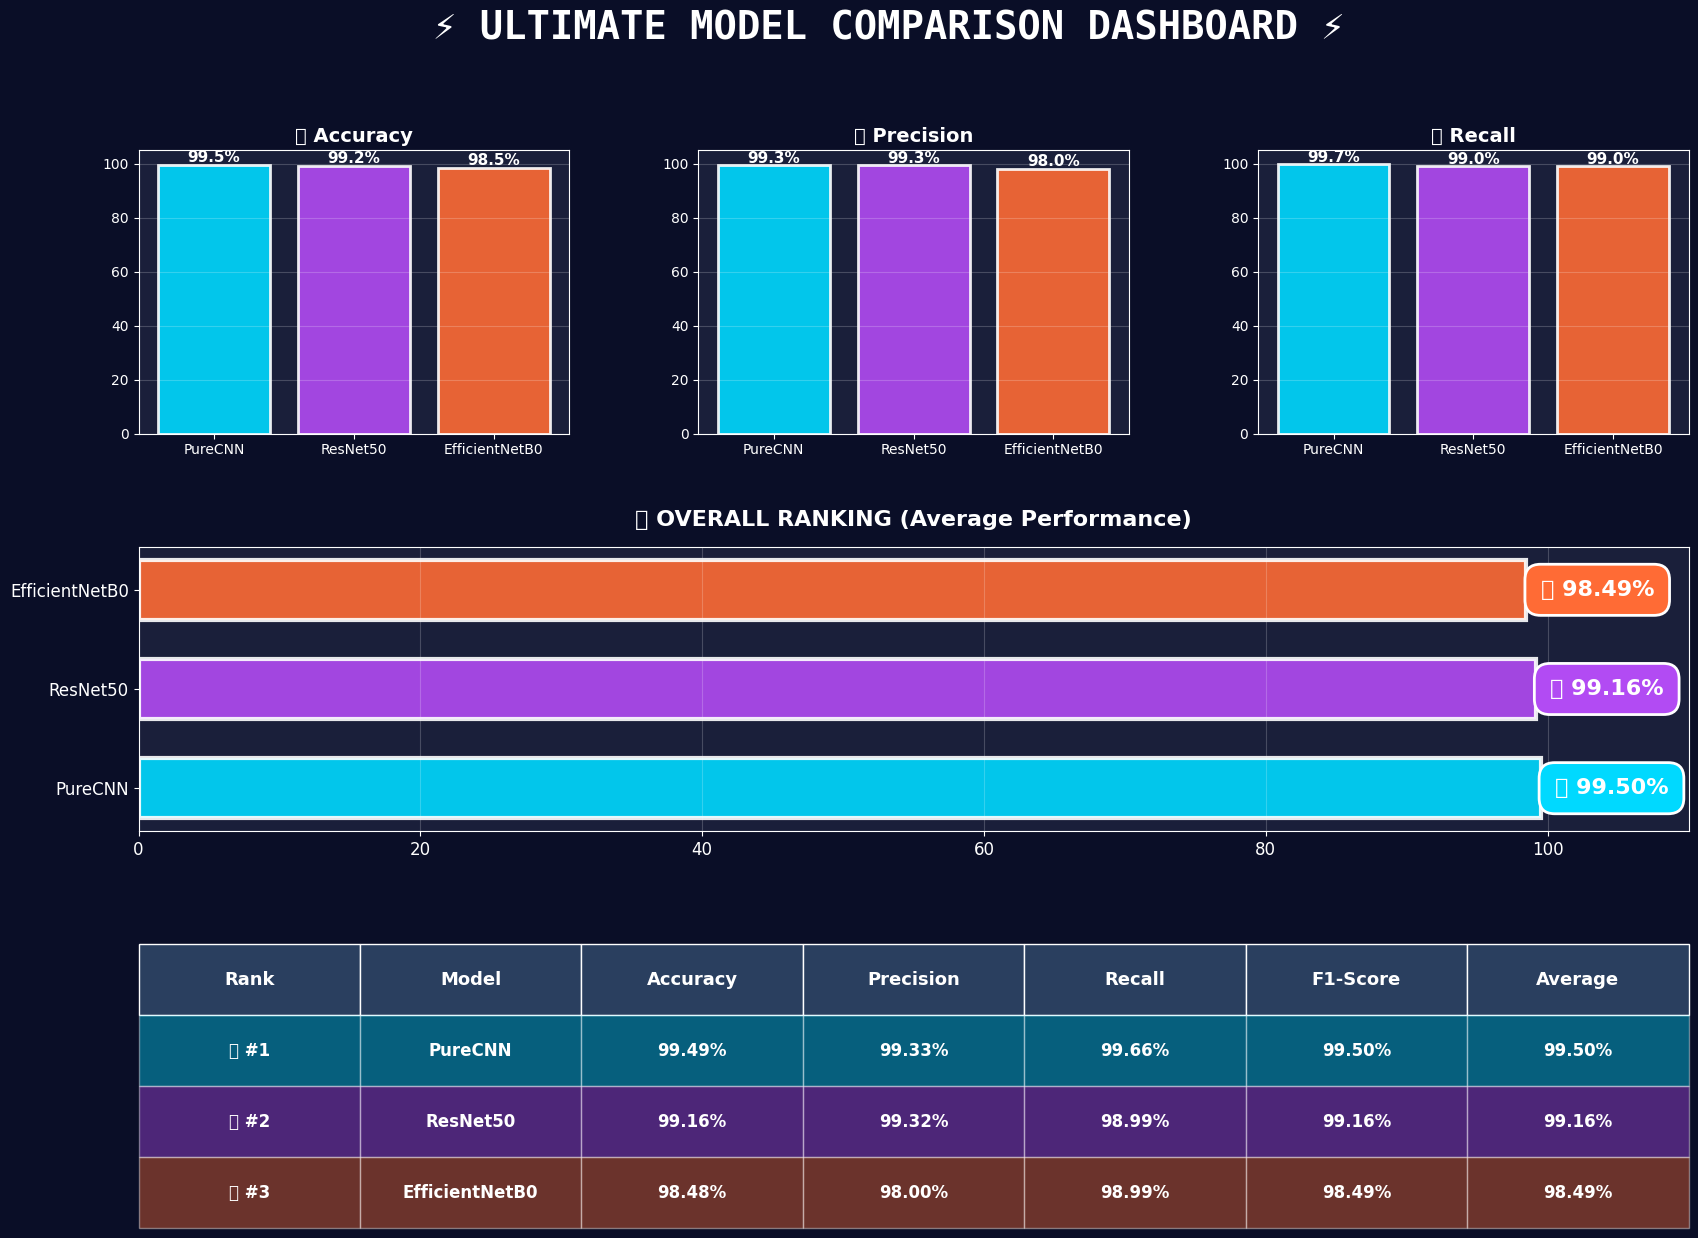

✅ Ultimate dashboard saved


In [8]:
# VIZ 5: Ultimate Dashboard
fig = plt.figure(figsize=(20, 14), facecolor=BG_GRADIENT['dark'])
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

fig.suptitle('⚡ ULTIMATE MODEL COMPARISON DASHBOARD ⚡', 
             fontsize=28, weight='bold', color='white', y=0.98, fontfamily='monospace')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Top row - Individual metrics
for idx, metric in enumerate(metrics[:3]):
    ax = fig.add_subplot(gs[0, idx])
    ax.set_facecolor(BG_GRADIENT['medium'])
    
    colors = [MODEL_COLORS[m] for m in df['Model']]
    bars = ax.bar(df['Model'], df[metric], color=colors, edgecolor='white', linewidth=2, alpha=0.9)
    
    for bar, val in zip(bars, df[metric]):
        ax.text(bar.get_x() + bar.get_width()/2, val + 1, f'{val:.1f}%',
               ha='center', fontsize=11, weight='bold', color='white')
    
    ax.set_title(f'⭐ {metric}', fontsize=14, weight='bold', color='white')
    ax.set_ylim(0, 105)
    ax.grid(axis='y', alpha=0.2, color='white')
    ax.tick_params(colors='white', labelsize=10)
    for spine in ax.spines.values():
        spine.set_color('white')

# Middle - F1 Score
ax = fig.add_subplot(gs[1, :])
ax.set_facecolor(BG_GRADIENT['medium'])
colors = [MODEL_COLORS[m] for m in df['Model']]
bars = ax.barh(df['Model'], df['Average'], color=colors, edgecolor='white', linewidth=3, alpha=0.9, height=0.6)

for i, (bar, val, model) in enumerate(zip(bars, df['Average'], df['Model'])):
    medal = '🥇' if i == 0 else '🥈' if i == 1 else '🥉'
    ax.text(val + 1, bar.get_y() + bar.get_height()/2, f'{medal} {val:.2f}%',
           va='center', fontsize=16, weight='bold', color='white',
           bbox=dict(boxstyle='round,pad=0.7', facecolor=MODEL_COLORS[model],
                    edgecolor='white', linewidth=2))

ax.set_title('🏆 OVERALL RANKING (Average Performance)', fontsize=16, weight='bold', color='white', pad=15)
ax.set_xlim(0, 110)
ax.grid(axis='x', alpha=0.2, color='white')
ax.tick_params(colors='white', labelsize=12)
for spine in ax.spines.values():
    spine.set_color('white')

# Bottom - Summary table
ax = fig.add_subplot(gs[2, :])
ax.axis('off')

table_data = []
for i, row in df.iterrows():
    medal = '🥇' if i == 0 else '🥈' if i == 1 else '🥉'
    table_data.append([
        f"{medal} #{i+1}",
        row['Model'],
        f"{row['Accuracy']:.2f}%",
        f"{row['Precision']:.2f}%",
        f"{row['Recall']:.2f}%",
        f"{row['F1-Score']:.2f}%",
        f"{row['Average']:.2f}%"
    ])

table = ax.table(cellText=table_data,
                colLabels=['Rank', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Average'],
                cellLoc='center', loc='center', bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 3)

# Style table
for i in range(7):
    table[(0, i)].set_facecolor(BG_GRADIENT['light'])
    table[(0, i)].set_text_props(weight='bold', color='white', fontsize=13)
    table[(0, i)].set_edgecolor('white')

for i in range(len(df)):
    model = df.loc[i, 'Model']
    for j in range(7):
        table[(i+1, j)].set_facecolor(MODEL_COLORS[model])
        table[(i+1, j)].set_alpha(0.4)
        table[(i+1, j)].set_text_props(weight='bold', color='white')
        table[(i+1, j)].set_edgecolor('white')

plt.savefig(os.path.join(OUTPUT_PATH, 'ultimate_dashboard.png'), 
           dpi=200, bbox_inches='tight', facecolor=BG_GRADIENT['dark'])
plt.show()
print("✅ Ultimate dashboard saved")

In [9]:
# Save report
report = {
    'date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'champion': {'model': df.loc[0, 'Model'], 'score': float(df.loc[0, 'Average'])},
    'ranking': df.to_dict('records')
}

with open(os.path.join(OUTPUT_PATH, 'report.json'), 'w', encoding='utf-8') as f:
    json.dump(report, f, indent=4)

print("\n" + "="*70)
print("🎉 COMPARISON COMPLETE!")
print("="*70)
print(f"\n🏆 CHAMPION: {report['champion']['model']} ({report['champion']['score']:.2f}%)")
print(f"\n📁 Saved to: {OUTPUT_PATH}")
print("\n📊 Files:")
print("   - performance_bars.png")
print("   - radar_neon.png")
print("   - heatmap_gradient.png")
print("   - podium.png")
print("   - ultimate_dashboard.png")
print("   - comparison.csv")
print("   - report.json")
print("="*70)


🎉 COMPARISON COMPLETE!

🏆 CHAMPION: PureCNN (99.50%)

📁 Saved to: C:\UAP_MachineLearning\allmodel

📊 Files:
   - performance_bars.png
   - radar_neon.png
   - heatmap_gradient.png
   - podium.png
   - ultimate_dashboard.png
   - comparison.csv
   - report.json
